In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [9]:
import os

print(os.listdir('.'))  
# This will list all files in the current directory

['-1.14-windows.xml', '.anaconda', '.cache', '.conda', '.condarc', '.continuum', '.gitconfig', '.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.matplotlib', '.virtual_documents', '.vscode', 'ansel', 'AppData', 'Application Data', 'battery-report.html', 'Contacts', 'Cookies', 'Documents', 'Downloads', 'Favorites', 'helloworld.c', 'image-captioning-output', 'Image_Captioning(Medical_images)data_preprocessing.ipynb', 'Links', 'Local Settings', 'Medical_images_model_training.ipynb', 'models', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{4300bfdd-3f19-11ee-a3ce-687a64ed5872}.TM.blf', 'NTUSER.DAT{4300bfdd-3f19-11ee-a3ce-687a64ed5872}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{4300bfdd-3f19-11ee-a3ce-687a64ed5872}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'PrintHood', 'Recent', 'Saved Games', 'Searches', 'SendTo', 'Start Menu', 'Templates', 'Untitled.ipynb', 'Untitled1.ipynb', 'Videos'

In [11]:
import pandas as pd
import os

#Paths to CSV files for train, validation, and test sets
train_path = r'D:\archive\all_data\train\radiologytraindata.csv'


val_path= r'D:\archive\all_data\validation\radiologyvaldata.csv'


test_path= r'D:\archive\all_data\test\radiologytestdata.csv'


# List of all file paths
file_paths = [train_path, val_path, test_path]

# Check if all files exist and load them
datasets = {}
missing_files = []

for path in file_paths:
    if os.path.exists(path):
        print(f"File found: {path}")
        # Load the data into a DataFrame
        dataset_name = os.path.basename(path).split('.')[0]  # e.g., radiologytraindata
        datasets[dataset_name] = pd.read_csv(path)
        print(f"Data from {dataset_name} loaded successfully!")
    else:
        print(f"File not found: {path}")
        missing_files.append(path)

# If there are missing files, print them
if missing_files:
    print("Some files are missing. Please verify the following paths:")
    for file_path in missing_files:
        print(file_path)
else:
    # If all files are loaded, explore the data
    for dataset_name, data in datasets.items():
        print(f"\n{dataset_name} Data:")
        print(data.head())
        print(f"Shape of {dataset_name}: {data.shape}")

File found: D:\archive\all_data\train\radiologytraindata.csv
Data from radiologytraindata loaded successfully!
File found: D:\archive\all_data\validation\radiologyvaldata.csv
Data from radiologyvaldata loaded successfully!
File found: D:\archive\all_data\test\radiologytestdata.csv
Data from radiologytestdata loaded successfully!

radiologytraindata Data:
           id                                    name  \
0  ROCO_00002          PMC4083729_AMHSR-4-14-g002.jpg   
1  ROCO_00003       PMC2837471_IJD2009-150251.001.jpg   
2  ROCO_00004  PMC2505281_11999_2007_30_Fig6_HTML.jpg   
3  ROCO_00005       PMC3745845_IJD2013-683423.005.jpg   
4  ROCO_00007   PMC4917066_amjcaserep-17-301-g001.jpg   

                                             caption  
0   Computed tomography scan in axial view showin...  
1   Bacterial contamination occurred after comple...  
2   The patient had residual paralysis of the han...  
3    Panoramic radiograph after immediate loading.\n  
4   Plain abdomen x-ray: 

In [13]:
#loading the data

In [15]:
# File paths
import pandas as pd

train_path = r'D:\archive\all_data\train\radiologytraindata.csv'


train_data = pd.read_csv(train_path)
# Add this line after loading and preprocessing the data
print(train_data.shape)
# Print specific columns

print(train_data.columns)
#display of data
print(train_data)

(65450, 3)
Index(['id', 'name', 'caption'], dtype='object')
               id                                           name  \
0      ROCO_00002                 PMC4083729_AMHSR-4-14-g002.jpg   
1      ROCO_00003              PMC2837471_IJD2009-150251.001.jpg   
2      ROCO_00004         PMC2505281_11999_2007_30_Fig6_HTML.jpg   
3      ROCO_00005              PMC3745845_IJD2013-683423.005.jpg   
4      ROCO_00007          PMC4917066_amjcaserep-17-301-g001.jpg   
...           ...                                            ...   
65445  ROCO_81819  PMC3517833_CRIM.HEMATOLOGY2012-490438.001.jpg   
65446  ROCO_81820               PMC5487234_rb-50-03-0190-g13.jpg   
65447  ROCO_81821                 PMC2974222_kjr-11-612-g001.jpg   
65448  ROCO_81822                 PMC3532764_AJNS-7-151-g002.jpg   
65449  ROCO_81823               PMC3509000_pone.0050319.g002.jpg   

                                                 caption  
0       Computed tomography scan in axial view showin...  
1    

In [17]:
#text Preprocessing:-This part remains the same. It processes the text data by converting to lowercase, removing links,
#new lines, words with numbers, extra spaces, special characters, stop words, and applying stemming and lemmatization

In [19]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Ensure stopwords and wordnet are downloaded
nltk.download('stopwords')
nltk.download('wordnet')

# Load the stopwords list
stop_words = set(stopwords.words('english'))

# Define preprocessing function
def preprocess_text(text):
    # 1. Lower Case
    text = text.lower()
    
    # 2. Remove Links
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # 3. Remove New Lines (\n)
    text = text.replace('\n', ' ')
    
    # 4. Remove Words Containing Numbers
    text = re.sub(r'\w*\d\w*', '', text)
    
    # 5. Remove Extra Spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # 6. Remove Special Characters
    text = re.sub(r'[^\w\s]', '', text)
    
    # 7. Remove Stop Words
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # 8. Stemming
    ps = PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    
    # 9. Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    
    return text

# File paths
train_path = r'D:\archive\all_data\train\radiologytraindata.csv'

# Load the data
train_data = pd.read_csv(train_path)

# Apply preprocessing to the caption column and store it in a new column
train_data['cleaned_caption'] = train_data['caption'].apply(preprocess_text)

# Check the result
print(train_data[['caption', 'cleaned_caption']].head())

# Display the shape of the data
print(train_data.shape)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ry981\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ry981\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                             caption  \
0   Computed tomography scan in axial view showin...   
1   Bacterial contamination occurred after comple...   
2   The patient had residual paralysis of the han...   
3    Panoramic radiograph after immediate loading.\n   
4   Plain abdomen x-ray: Multiple air levels at t...   

                                     cleaned_caption  
0  comput tomographi scan axial view show obliter...  
1  bacteri contamin occur complet root canal trea...  
2  patient residu paralysi hand poliomyel necessa...  
3                     panoram radiograph immedi load  
4  plain abdomen xray multipl air level midabdome...  
(65450, 4)


In [21]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [23]:
import pandas as pd
import os
import cv2
from tqdm import tqdm

# Define paths to CSV files for train, validation, and test sets
train_path = r'D:\archive\all_data\train\radiologytraindata.csv'

# Load the data
train_data = pd.read_csv(train_path)

# Directory containing the images
image_dir = r'D:\archive\all_data\train\radiology\images'

# Initialize a list to hold missing images
missing_images = []

# Identify missing images
for img_name in tqdm(train_data['name'], desc="Checking images"):
    img_path = os.path.join(image_dir, img_name)
    if not os.path.exists(img_path):
        missing_images.append(img_name)

# Print number of missing images
print(f"Number of missing images: {len(missing_images)}")

# Remove rows with missing images from the DataFrame
train_data_cleaned = train_data[~train_data['name'].isin(missing_images)]

# Save the cleaned data to a new CSV file
cleaned_csv_path = r'D:\archive\all_data\train\radiology\cleaned_traindata.csv'
train_data_cleaned.to_csv(cleaned_csv_path, index=False)

print(f"Cleaned data saved to {cleaned_csv_path}")

Checking images: 100%|██████████| 65450/65450 [00:11<00:00, 5587.90it/s] 


Number of missing images: 30
Cleaned data saved to D:\archive\all_data\train\radiology\cleaned_traindata.csv


In [25]:
# image preprocessing 

Processing images: 100%|██████████| 1825/1825 [00:18<00:00, 101.22it/s]


Number of missing images: 0
(1825, 5)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


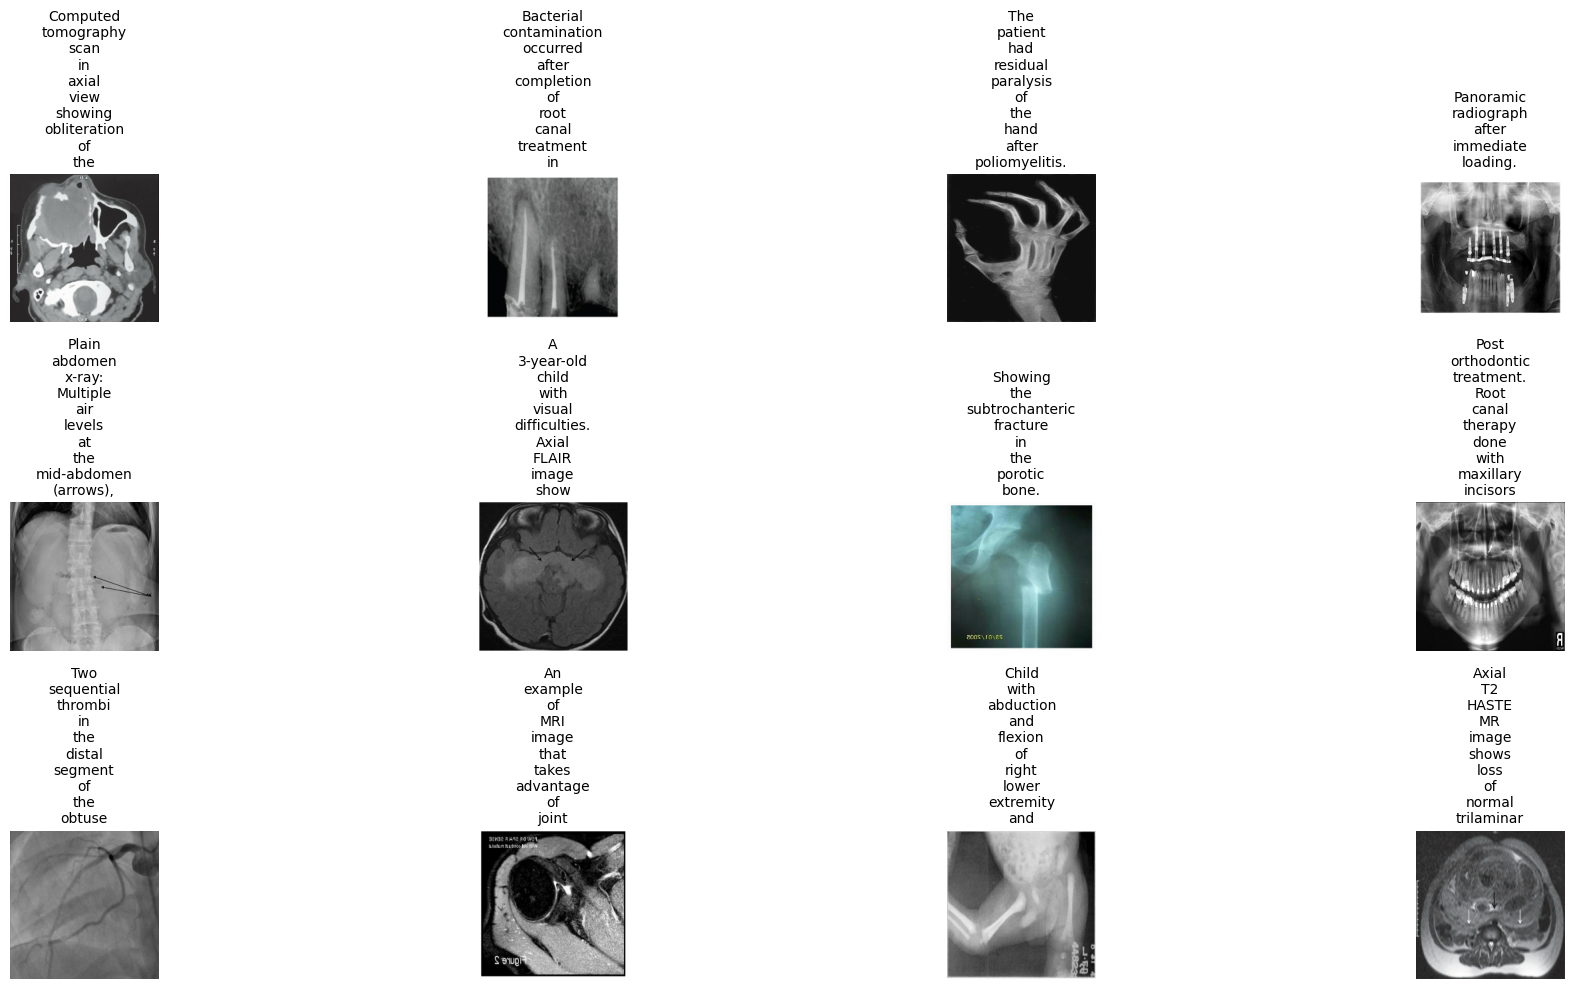

In [27]:
import pandas as pd
import os
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

# Define image loading function using TensorFlow
def load_image(image_path):
    image = tf.io.read_file(image_path)  # Read image file
    image = tf.image.decode_jpeg(image, channels=3)  # Decode JPEG image
    return image

# Define image preprocessing function using TensorFlow
def preprocess_image(image, target_size=(224, 224)):
    image = tf.image.resize(image, target_size)  # Resize the image
    image = tf.image.random_flip_left_right(image)  # Random flip
    image = tf.image.random_brightness(image, max_delta=0.1)  # Random brightness
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)  # Random contrast
    image = image / 255.0  # Normalize pixel values
    return image

# File path for training data
train_path = r'D:\archive\all_data\train\radiologytraindata.csv'

# Load the preprocessed text data
train_data = pd.read_csv(train_path)

# Ensure 'cleaned_caption' column exists, if not, use 'caption' column
if 'cleaned_caption' not in train_data.columns:
    train_data['cleaned_caption'] = train_data['caption']

# Limit to the first 1825 images
train_data = train_data.head(1825)

# Directory containing the images
image_dir = r'D:\archive\all_data\train\radiology\images'

# Load images and check for missing ones
image_data = []
missing_images = []

# Process images
for img_name in tqdm(train_data['name'], desc="Processing images"):
    img_path = os.path.join(image_dir, img_name)
    try:
        img = load_image(img_path)
        img = preprocess_image(img)
        image_data.append(img.numpy())  # Convert Tensor to NumPy array
    except Exception as e:
        print(f"Error loading image {img_name}: {e}")
        missing_images.append(img_name)

# Report missing images
print(f"Number of missing images: {len(missing_images)}")
if missing_images:
    print("Missing images:")
    for img_name in missing_images[:10]:  # Print only first 10 missing images for brevity
        print(img_name)

# Filter out rows with missing images
train_data = train_data[~train_data['name'].isin(missing_images)]

# Add the processed images to the DataFrame
train_data = train_data.iloc[:len(image_data)]
train_data['image'] = image_data

# Display the shape of the data
print(train_data.shape)

# Display the first 12 images and their cleaned captions
if not train_data.empty:
    fig, axs = plt.subplots(3, 4, figsize=(20, 10))
    for i, ax in enumerate(axs.flatten()):
        if i < len(train_data):
            example_row = train_data.iloc[i]
            ax.imshow(example_row['image'])
            caption = example_row['cleaned_caption']
            ax.set_title("\n".join(caption.split()[:10]), fontsize=10)
            ax.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No images were loaded successfully.")

In [29]:
#model building
#Divide the dataset in to Train (70%), Test (20%) and Validation (10%) datasets.


In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming dataset is already loaded and preprocessed
# Here's an example dataset definition:
dataset = pd.DataFrame({
    'id': range(1000),
    'name': ['image_{}.jpg'.format(i) for i in range(1000)],
    'caption': ['This is caption {}'.format(i) for i in range(1000)],
    'cleaned_caption': ['cleaned caption {}'.format(i) for i in range(1000)],
    'image': [np.random.rand(224, 224, 3) for i in range(1000)]  # Assuming images are already preprocessed
})

# Split the data into train (70%) and temp (30%) first
train_data, temp_data = train_test_split(dataset, test_size=0.3, random_state=42)

# Further split temp into test (20%) and validation (10%)
test_data, validation_data = train_test_split(temp_data, test_size=1/3, random_state=42)

print(f'Train data shape: {train_data.shape}')
print(f'Test data shape: {test_data.shape}')
print(f'Validation data shape: {validation_data.shape}')

Train data shape: (700, 5)
Test data shape: (200, 5)
Validation data shape: (100, 5)


In [33]:
#DATA PREPRATION

In [35]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters
max_text_length = 100
embedding_dim = 256
vocab_size = 10000

# Tokenize and pad text data
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(train_data['cleaned_caption'])
train_sequences = tokenizer.texts_to_sequences(train_data['cleaned_caption'])
train_sequences = pad_sequences(train_sequences, maxlen=max_text_length, padding='post')
train_targets = np.array(train_sequences)[:, 1:]

test_sequences = tokenizer.texts_to_sequences(test_data['cleaned_caption'])
test_sequences = pad_sequences(test_sequences, maxlen=max_text_length, padding='post')
test_targets = np.array(test_sequences)[:, 1:]

validation_sequences = tokenizer.texts_to_sequences(validation_data['cleaned_caption'])
validation_sequences = pad_sequences(validation_sequences, maxlen=max_text_length, padding='post')
validation_targets = np.array(validation_sequences)[:, 1:]

# Convert image data to numpy arrays
train_images = np.array(train_data['image'].tolist())
test_images = np.array(test_data['image'].tolist())
validation_images = np.array(validation_data['image'].tolist())

print(f'Shape of padded sequences: {train_sequences.shape}')
print(f'Shape of images array: {train_images.shape}')

Shape of padded sequences: (700, 100)
Shape of images array: (700, 224, 224, 3)


In [37]:
print(train_images.shape)  #checking shape
print(test_images.shape)

(700, 224, 224, 3)
(200, 224, 224, 3)


In [39]:
#CNN (CONVOLUTIONAL NUERAL NETWORK) + RNN(RECURRENT NUERALNETWORK) MODEL
#(CNN-RNN model) = CNN + LSTM


In [41]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, Concatenate, GlobalAveragePooling2D

def build_model1(vocab_size, max_text_length, embedding_dim):
    # Define the image model (CNN part)
    image_input = Input(shape=(224, 224, 3))
    x = tf.keras.applications.ResNet50(weights='imagenet', include_top=False)(image_input)
    x = GlobalAveragePooling2D()(x)
    image_model = Model(inputs=image_input, outputs=x)

    # Define the text model (RNN part)
    text_input = Input(shape=(max_text_length,))
    x = Embedding(vocab_size, embedding_dim, input_length=max_text_length)(text_input)
    x = LSTM(256, return_sequences=True)(x)
    x = LSTM(256)(x)
    text_model = Model(inputs=text_input, outputs=x)

    # Combine both models using concatenation
    combined_input = Concatenate()([image_model.output, text_model.output])
    x = Dense(256, activation='relu')(combined_input)
    x = Dropout(0.5)(x)
    x = Dense(vocab_size, activation='softmax')(x)

    # Create the final model
    model = Model(inputs=[image_model.input, text_model.input], outputs=x)
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
    
    return model

model1 = build_model1(vocab_size, max_text_length, embedding_dim)
model1.summary()

D:\Anaconda\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 100, 256)  │  2,560,000 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 7, 7,      │ 23,587,712 │ input_layer[0][0] │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 100, 256)  │    525,312 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet50[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 256)       │    525,312 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 2304)      │          0 │ global_average_p… │
│ (Concatenate)       │                   │            │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │    590,080 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 10000)     │  2,570,000 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 30,358,416 (115.81 MB)

 Trainable params: 30,305,296 (115.61 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [43]:
#captioning model


In [45]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add
from tensorflow.keras.utils import plot_model

# Define the captioning model
def define_model(vocab_size, max_length):
    # Features from the CNN model compressed from 2048 to 256 nodes
    inputs1 = Input(shape=(2048,))
    fe1 = Dropout(0.5)(inputs1)
    fe2 = Dense(256, activation='relu')(fe1)
    
    # LSTM sequence model
    inputs2 = Input(shape=(max_length,))
    se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
    se2 = Dropout(0.5)(se1)
    se3 = LSTM(256)(se2)
    
    # Merging both models
    decoder1 = add([fe2, se3])
    decoder2 = Dense(256, activation='relu')(decoder1)
    outputs = Dense(vocab_size, activation='softmax')(decoder2)
    
    # Merge it [image, seq] [word]
    model = Model(inputs=[inputs1, inputs2], outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    
    # Summarize model
    print(model.summary())
    
    # Plot model
    plot_model(model, to_file='model.png', show_shapes=True)

    return model

# Example usage:
vocab_size = 10000  # Example vocabulary size
max_length = 100    # Example maximum length of text sequences
model = define_model(vocab_size, max_length)

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 2048)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 100, 256)  │  2,560,000 │ input_layer_4[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 2048)      │          0 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 100, 256)  │          0 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 100)       │          0 │ input_layer_4[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 256)       │    524,544 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 256)       │    525,312 │ dropout_2[0][0],  │
│                     │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 256)       │          0 │ dense_2[0][0],    │
│                     │                   │            │ lstm_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 256)       │     65,792 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 10000)     │  2,570,000 │ dense_3[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 6,245,648 (23.83 MB)

 Trainable params: 6,245,648 (23.83 MB)

 Non-trainable params: 0 (0.00 B)

None
You must install pydot (`pip install pydot`) for `plot_model` to work.


In [47]:
# Training function
def train_model(model, train_generator, steps_per_epoch, epochs):
    for epoch in range(epochs):
        print(f"Epoch [{epoch+1}/{epochs}]")
        epoch_loss = 0
        for step in range(steps_per_epoch):
            batch = next(train_generator)
            X, y = batch
            loss = model.train_on_batch(X, y)
            epoch_loss += loss
        epoch_loss /= steps_per_epoch
        print(f"Loss: {epoch_loss:.4f}")
        model.save(f"models/model_{epoch}.h5")
        print(f"Model saved for epoch {epoch}")

In [49]:
# Evaluation function
def evaluate_model(model, test_generator, steps):
    total_loss = 0
    for step in range(steps):
        batch = next(test_generator)
        X, y = batch
        loss = model.test_on_batch(X, y)
        total_loss += loss
    avg_loss = total_loss / steps
    print(f"Average Test Loss: {avg_loss:.4f}")

In [53]:
from tensorflow.keras.utils import to_categorical
from keras.utils import to_categorical
# Data generator function
def data_generator(descriptions, photos, tokenizer, max_length, vocab_size, batch_size=1):
    X1, X2, y = [], [], []
    while True:
        for key, desc_list in descriptions.items():
            # Retrieve the photo features
            photo = photos[key]
            for desc in desc_list:
                # Encode the sequence
                seq = tokenizer.texts_to_sequences([desc])[0]
                # Split into X, y pairs
                for i in range(1, len(seq)):
                    in_seq, out_seq = seq[:i], seq[i]
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                    X1.append(photo)
                    X2.append(in_seq)
                    y.append(out_seq)
                    # Yield the batch data
                    if len(X1) == batch_size:
                        yield [[np.array(X1), np.array(X2)], np.array(y)]
                        X1, X2, y = [], [], []

# Example data
# Replace these with your actual data loading and preprocessing
train_descriptions = {
    'image_1': ['startseq description of image one endseq'],
    'image_2': ['startseq description of image two endseq']
}
test_descriptions = {
    'image_3': ['startseq description of image three endseq']
}
train_features = {
    'image_1': np.random.rand(2048),
    'image_2': np.random.rand(2048)
}
test_features = {
    'image_3': np.random.rand(2048)
}

# Tokenizer
descriptions = list(train_descriptions.values()) + list(test_descriptions.values())
tokenizer = Tokenizer()
tokenizer.fit_on_texts([item for sublist in descriptions for item in sublist])
vocab_size = len(tokenizer.word_index) + 1
max_length = max(len(desc.split()) for desc_list in descriptions for desc in desc_list)

# Instantiate the model
model = define_model(vocab_size, max_length)

# Define the number of steps per epoch
steps_per_epoch = sum(len(desc_list) for desc_list in train_descriptions.values())

# Define the batch size
batch_size = 1

# Create data generators
train_generator = data_generator(train_descriptions, train_features, tokenizer, max_length, vocab_size, batch_size)
test_generator = data_generator(test_descriptions, test_features, tokenizer, max_length, vocab_size, batch_size)

# Create a directory to save models
if not os.path.exists('models'):
    os.mkdir('models')

# Define the number of epochs
num_epochs = 10

# Train the model
print("Training Model")
train_model(model, train_generator, steps_per_epoch, num_epochs)

# Evaluate the model
print("Evaluating Model")
evaluate_model(model, test_generator, steps=len(test_descriptions))

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_7       │ (None, 2048)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, 6, 256)    │      2,304 │ input_layer_8[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 2048)      │          0 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 6, 256)    │          0 │ embedding_3[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_2         │ (None, 6)         │          0 │ input_layer_8[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 256)       │    524,544 │ dropout_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_4 (LSTM)       │ (None, 256)       │    525,312 │ dropout_6[0][0],  │
│                     │                   │            │ not_equal_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 256)       │          0 │ dense_8[0][0],    │
│                     │                   │            │ lstm_4[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 256)       │     65,792 │ add_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 9)         │      2,313 │ dense_9[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,120,265 (4.27 MB)

 Trainable params: 1,120,265 (4.27 MB)

 Non-trainable params: 0 (0.00 B)

None
You must install pydot (`pip install pydot`) for `plot_model` to work.
Training Model
Epoch [1/10]


Loss: 3.1976
Model saved for epoch 0
Epoch [2/10]


Loss: 2.9860
Model saved for epoch 1
Epoch [3/10]


Loss: 3.3608
Model saved for epoch 2
Epoch [4/10]


Loss: 2.8881
Model saved for epoch 3
Epoch [5/10]


Loss: 2.8716
Model saved for epoch 4
Epoch [6/10]


Loss: 2.7294
Model saved for epoch 5
Epoch [7/10]


Loss: 2.6573
Model saved for epoch 6
Epoch [8/10]


Loss: 2.5840
Model saved for epoch 7
Epoch [9/10]


Loss: 2.5091
Model saved for epoch 8
Epoch [10/10]


Loss: 2.5885
Model saved for epoch 9
Evaluating Model
Average Test Loss: 2.5622
